In [15]:
import numpy as np
from scipy.special import j0, j1, jn_zeros, jnjnp_zeros

In [48]:
M = 2
L = 7
FINESSE = 110

In [75]:
# Stores the zeros of the bessel function Jml
zeros = np.array([jn_zeros(m, L) for m in range(M)])
# Adds a zero to the zeros of the bessel function Jml
zero = np.zeros(1)
# Concatenate the zeros[1] minus the last element to the array zero
zero = np.concatenate((zero, zeros[1, :-1]))
zeros[1] = zero
print(zeros)


[[ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771 18.07106397
  21.21163663]
 [ 0.          3.83170597  7.01558667 10.17346814 13.32369194 16.47063005
  19.61585851]]


In [50]:
print('zero m = 0, l = 0 to 40')
print(zeros[0])
print('\n')
print('zero m = 1, l = 0 to 40')
print(zeros[1])

zero m = 0, l = 0 to 40
[ 2.40482556  5.52007811  8.65372791 11.79153444 14.93091771 18.07106397
 21.21163663]


zero m = 1, l = 0 to 40
[ 0.          3.83170597  7.01558667 10.17346814 13.32369194 16.47063005
 19.61585851]


In [79]:
# Compute the values of the Bessel functions J0 and J1 at the zeros times the radius
radii = np.linspace(0,1,FINESSE)
J0_xr = np.array([j0(zeros[0]*r) for r in radii])
J1_xr = np.array([j1(zeros[1]*r) for r in radii])
print(J0_xr[-1])
print(J1_xr[-1])
print(j0(zeros[0]))

1.0
[ 9.58688255e-17 -1.64951298e-17 -8.70443181e-17 -2.64819844e-16
  3.11635065e-17  2.01869239e-17  2.34410915e-16]
[ 0.00000000e+00 -9.33584691e-17  5.43465099e-17 -3.54100028e-16
  1.57743458e-16  1.88258368e-16 -2.82510821e-16]
[ 9.58688255e-17 -1.64951298e-17 -8.70443181e-17 -2.64819844e-16
  3.11635065e-17  2.01869239e-17  2.34410915e-16]


In [52]:
print('Bessel function j_m=0 for l = 0 to 40')
print(J0_xr.shape)
print('\n')
print('Bessel function j_m=1 for l = 0 to 40')
print(J1_xr.shape)

Bessel function j_m=0 for l = 0 to 40
(110, 7)


Bessel function j_m=1 for l = 0 to 40
(110, 7)


## Computation of the monodimensional $g_m^{c,s}(r) = \sum_{l=0}^{\infty}a_{ml}^{c,s}J_m(x_{ml}r)$

In [53]:
from scipy.io import readsav

shot = 30929
st = readsav(f'../Data/rfx_{shot}_2.sav', python_dict=False).st

# Take the expansion coefficients from the structure
a0cl, a1cl, a1sl = np.split(st["emiss"][0]["coeff"][0][0], 3)
print(a0cl.shape)

(7,)


In [54]:
g1 = np.dot(J1_xr, a1cl) + np.dot(J1_xr, a1sl)
print(g1.shape)

(110,)


In [69]:
# Now compute the 2D emissivity profile

theta = np.linspace(0, 2*np.pi, FINESSE)

# Compute the 2D emissivity profile for each value of r and theta
emissivity_profile = []
for t in theta:
  emissivity_profile.append((np.dot(J0_xr, a0cl)) + (np.dot(J1_xr, a1cl)*np.cos(t)) + (np.dot(J1_xr, a1sl)*np.sin(t)))

# Convert the list to a numpy array
emissivity_profile = np.array(emissivity_profile)


emissivity_profile = emissivity_profile.T

grt = (np.dot(J0_xr, a0cl)) + (np.dot(J1_xr, a1cl)*np.cos(theta)) + (np.dot(J1_xr, a1sl)*np.sin(theta))

In [56]:
grt.shape

(110,)

(110, 110)


/tmp/ipykernel_21858/205986139.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, y, emissivity_profile_cartesian)


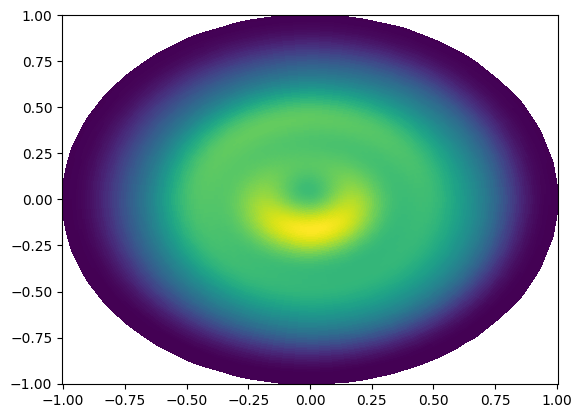

57.30947917422248
65.08035319838434


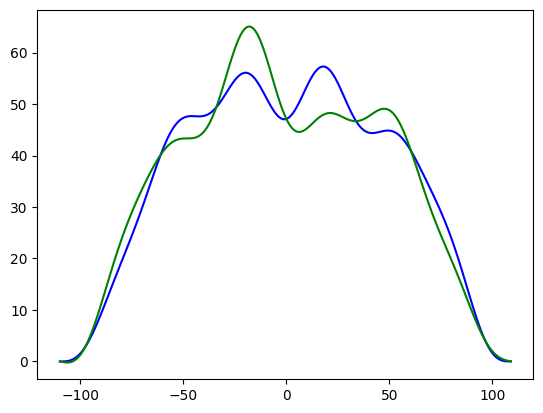

0.46362845164424954
0.4588399154322322


In [67]:
import matplotlib.pyplot as plt

# Convert polar coordinates to Cartesian coordinates
x = np.outer(radii, np.cos(theta))
y = np.outer(radii, np.sin(theta))

# Reshape the emissivity profile matrix to match the Cartesian coordinates
emissivity_profile_cartesian = np.reshape(emissivity_profile, (len(radii), len(theta)))
print(emissivity_profile_cartesian.shape)
# Plot the emissivity profile in Cartesian coordinates
# plt.imshow(emissivity_profile_cartesian, aspect='auto')
plt.pcolormesh(x, y, emissivity_profile_cartesian)
# plt.colorbar()
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Emissivity Profile (Cartesian Coordinates)')
plt.show()

plt.plot(emissivity_profile_cartesian[:, 0], color='b')
plt.plot(np.linspace(0, -110, 110), emissivity_profile_cartesian[:, 55], color='b')
plt.plot(emissivity_profile_cartesian[:, 27], color='g')
plt.plot(np.linspace(0, -110, 110), emissivity_profile_cartesian[:, 82], color='g')
print(np.nanmax(emissivity_profile_cartesian[:, 0]))
print(np.nanmax(emissivity_profile_cartesian[:, 82]))
plt.show()

print(57.30947917422248/123.61079)
print(65.08035319838434/141.83673)


In [37]:
emissivity_profile

array([[ 4.70987269e+01,  4.70987269e+01,  4.70987269e+01, ...,
         4.70987269e+01,  4.70987269e+01,  4.70987269e+01],
       [ 4.73175233e+01,  4.72689274e+01,  4.72199902e+01, ...,
         4.74130471e+01,  4.73656165e+01,  4.73175233e+01],
       [ 4.76665774e+01,  4.75698623e+01,  4.74724719e+01, ...,
         4.78566999e+01,  4.77622959e+01,  4.76665774e+01],
       ...,
       [ 7.57294467e-03,  1.74340587e-02,  2.72612243e-02, ...,
        -1.21200942e-02, -2.28936016e-03,  7.57294467e-03],
       [-3.72048147e-03,  1.24963409e-03,  6.20595170e-03, ...,
        -1.36360746e-02, -8.68788478e-03, -3.72048147e-03],
       [ 1.62540513e-15,  1.66640262e-15,  1.70998267e-15, ...,
         1.55169353e-15,  1.58712638e-15,  1.62540513e-15]])

In [27]:
import sys
np.printoptions(precision=2, threshold=sys.maxsize)

In [28]:
emissivity_profile_cartesian

array([[ 4.70987269e+01,  4.70987269e+01,  4.70987269e+01, ...,
         4.70987269e+01,  4.70987269e+01,  4.70987269e+01],
       [ 4.73175233e+01,  4.72689274e+01,  4.72199902e+01, ...,
         4.74130471e+01,  4.73656165e+01,  4.73175233e+01],
       [ 4.76665774e+01,  4.75698623e+01,  4.74724719e+01, ...,
         4.78566999e+01,  4.77622959e+01,  4.76665774e+01],
       ...,
       [ 7.57294467e-03,  1.74340587e-02,  2.72612243e-02, ...,
        -1.21200942e-02, -2.28936016e-03,  7.57294467e-03],
       [-3.72048147e-03,  1.24963409e-03,  6.20595170e-03, ...,
        -1.36360746e-02, -8.68788478e-03, -3.72048147e-03],
       [ 1.62540513e-15,  1.66640262e-15,  1.70998267e-15, ...,
         1.55169353e-15,  1.58712638e-15,  1.62540513e-15]])